# 0. Prepare data

In [2]:
import math
import numpy as np
import pandas as pd
from rdkit import Chem
import sys
sys.path.append('/home/labhhc2/Documents/workspace/D20/Ngoc/Mol2DSimi/Mol2DSimi')
from Similarity import similarity_calculate
from enrichment_factor import Enrichment_Factor
# from validation import  similarity_validation

In [3]:
import json
with open('/home/labhhc2/Documents/workspace/D20/Ngoc/Mol2DSimi/Data/fw_data.json.gz','rb') as f:
    data=json.load(f)


In [5]:
len(data[10]['negative_reactions'])

4

In [6]:
dct={'ID':[],'rxn':[],'pro':[],'de1':[],'de2':[]}



for idx,i in enumerate(data):
    
    
    
    try:
        if len(i['negative_reactions'])==3:
            dct['ID'].append(i['R-id'])
            dct['rxn'].append(i['reactions'])
            dct['pro'].append(i['positive_reactions'].split('>>')[1]) 
            dct['de1'].append(i['negative_reactions'])
            dct['de2'].append(i['reactions'])
    except:
        continue
data[idx_lst[0]]

NameError: name 'idx_lst' is not defined

In [7]:
dct={'ID':[],'rxn':[],'pro':[],'de1':[],'de2':[],'idx':[]}
for idx,i in enumerate(data):
    try:
        if len(i['negative_reactions'])==2:
            dct['ID'].append(i['R-id'])
            dct['rxn'].append(i['reactions'])
            dct['pro'].append(i['positive_reactions'].split('>>')[1]) 
            dct['de1'].append(i['negative_reactions'][0].split('>>')[1])
            dct['de2'].append(i['negative_reactions'][1].split('>>')[1])
            # dct['de3'].append(i['negative_reactions'][2].split('>>')[1])
            dct['idx'].append(idx)
    except:
        continue



In [8]:
for idx,i in enumerate(dct['idx']):
    if len(dct['pro'][idx].split('.')) >1 and len(dct['de1'][idx].split('.'))==2:
        print(i)
        break
    

6


In [9]:
data[79]

{'R-id': 3479,
 'class': [5],
 'reactions': 'CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC4CCCCO4)CC3)ccc1-2.O>>CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCO)CC3)ccc1-2.OC1CCCCO1',
 'positive_reactions': 'CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC4CCCCO4)CC3)ccc1-2.O>>CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCO)CC3)ccc1-2.OC1CCCCO1',
 'negative_reactions': ['CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC4CCCCO4)CC3)ccc1-2.O>>CC(C)n1ncnc1-c1nc(-c2ccc(C3CCN(CCOC4CCCCO4)CC3)cc2O)c(CCO)s1',
  'CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC4CCCCO4)CC3)ccc1-2.O>>CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC(O)CCCCO)CC3)ccc1-2']}

In [ ]:
data[6]

In [10]:
#test_pro2_de1
import pandas as pd
pro =pd.Series(['C(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCO)CC3)ccc1-2','OC1CCCCO1'])
de=pd.Series(['CC(C)n1ncnc1-c1nc(-c2ccc(C3CCN(CCOC4CCCCO4)CC3)cc2O)c(CCO)s1','CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC(O)CCCCO)CC3)ccc1-2'])

pro1 = 'C(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCO)CC3)ccc1-2'
pro2 = 'OC1CCCCO1'
de1 = 'CC(C)n1ncnc1-c1nc(-c2ccc(C3CCN(CCOC4CCCCO4)CC3)cc2O)c(CCO)s1'
de2 = 'CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC(O)CCCCO)CC3)ccc1-2'

In [ ]:
#test_pro1_de2
# pro =['C(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCO)CC3)ccc1-2','OC1CCCCO1']

# pro1 = 'C(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCO)CC3)ccc1-2'
# pro2 = 'OC1CCCCO1'
# de1 = 'CC(C)n1ncnc1-c1nc(-c2ccc(C3CCN(CCOC4CCCCO4)CC3)cc2O)c(CCO)s1'
# de2 = 'CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC(O)CCCCO)CC3)ccc1-2'

In [11]:
#Test reaction 79
pro1_Canon = pro.apply(Chem.CanonSmiles)
pro1_mol= pro1_Canon.apply(Chem.MolFromSmiles)
lst_pro=[Chem.MolFromSmiles(Chem.CanonSmiles(i)) for i in pro]
lst_pro

In [12]:
de_canon=np.array([Chem.CanonSmiles(i) for i in de])
de_mol= np.array([Chem.MolFromSmiles(i) for i in de_canon])
de_active=np.array([1,1])
dic={'CanonSmiles':np.array([Chem.CanonSmiles(i) for i in de]),
     'Molecules':np.array([Chem.MolFromSmiles(i) for i in de_canon]),
     'Active':np.array([1,1]),}
data=pd.DataFrame(dic)

In [6]:
for i in lst_pro:
    simi = similarity_calculate(data = data, query= i, smile_col="CanonSmiles", active_col='Active')
    simi.fit()
    # simi.plot()

[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerat

CanonSmiles  \
0  CC(C)n1ncnc1-c1nc(-c2ccc(C3CCN(CCOC4CCCCO4)CC3...   
1  CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC(O)CC...   

                                          Molecules  Active  \
0  <rdkit.Chem.rdchem.Mol object at 0x7c5e401cdb60>       1   
1  <rdkit.Chem.rdchem.Mol object at 0x7c5e401cdbd0>       1   

                                              ROMol  tanimoto_avalon  \
0  <rdkit.Chem.rdchem.Mol object at 0x7c5d9313c2e0>         0.698574   
1  <rdkit.Chem.rdchem.Mol object at 0x7c5d9313c900>         0.943107   

   tanimoto_maccs  tanimoto_ecfp2  tanimoto_ecfp4  tanimoto_ecfp6  \
0        0.805556        0.596154        0.452632        0.319444   
1        0.873239        0.714286        0.635294        0.564516   

   tanimoto_fcfp2  ...  dice_ecfp2  dice_ecfp4  dice_ecfp6  dice_fcfp2  \
0        0.058824  ...    0.746988    0.623188    0.484211    0.111111   
1        0.028169  ...    0.833333    0.776978    0.721649    0.054795   

   dice_fcfp4  dice_fcfp6  dice_rdk5  dice_rdk6  dice_rdk7  dice_map4  
0    0.031250    0.033520   0.934596   0.933764   0.915699   0.730263  
1    0.031008    0.010929   0.967960   0.973284   0.972740   0.767347  

[2 rows x 28 columns]

[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerator
[17:53:57] DEPRECATION WARNING: please use MorganGenerat

CanonSmiles  \
0  CC(C)n1ncnc1-c1nc(-c2ccc(C3CCN(CCOC4CCCCO4)CC3...   
1  CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(C3CCN(CCOC(O)CC...   

                                          Molecules  Active  \
0  <rdkit.Chem.rdchem.Mol object at 0x7c5e401cdb60>       1   
1  <rdkit.Chem.rdchem.Mol object at 0x7c5e401cdbd0>       1   

                                              ROMol  tanimoto_avalon  \
0  <rdkit.Chem.rdchem.Mol object at 0x7c5d9313ca50>         0.082915   
1  <rdkit.Chem.rdchem.Mol object at 0x7c5d9313d000>         0.073009   

   tanimoto_maccs  tanimoto_ecfp2  tanimoto_ecfp4  tanimoto_ecfp6  \
0        0.289855        0.170213        0.137500        0.110092   
1        0.277778        0.120000        0.082353        0.050420   

   tanimoto_fcfp2  ...  dice_ecfp2  dice_ecfp4  dice_ecfp6  dice_fcfp2  \
0             0.0  ...    0.290909    0.241758    0.198347         0.0   
1             0.0  ...    0.214286    0.152174    0.096000         0.0   

   dice_fcfp4  dice_fcfp6  dice_rdk5  dice_rdk6  dice_rdk7  dice_map4  
0    0.022472         0.0   0.153846   0.127144   0.075275   0.098901  
1    0.000000         0.0   0.142209   0.113135   0.063612   0.103121  

[2 rows x 28 columns]

In [ ]:
data[79]]

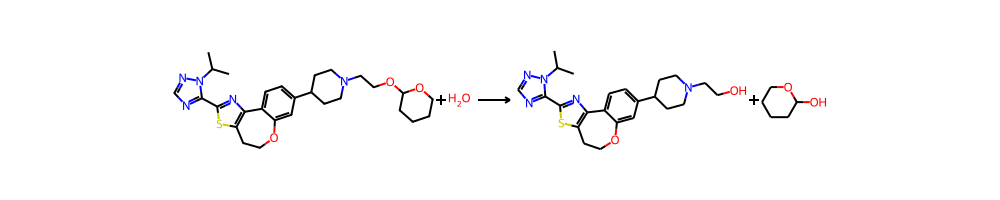

In [20]:
#Visualize positive reaction
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
# smi= 'COC(=O)c1cccc(CON=C2CCN(S(=O)(=O)c3ccc(OC(F)(F)F)cc3)CC2)c1.O>>CO.O=C(O)c1cccc(CON=C2CCN(S(=O)(=O)c3ccc(OC(F)(F)F)cc3)CC2)c1',
smi=data[79]['reactions']
reaction=AllChem.ReactionFromSmarts(smi,useSmiles=True)
Draw.ReactionToImage(reaction)

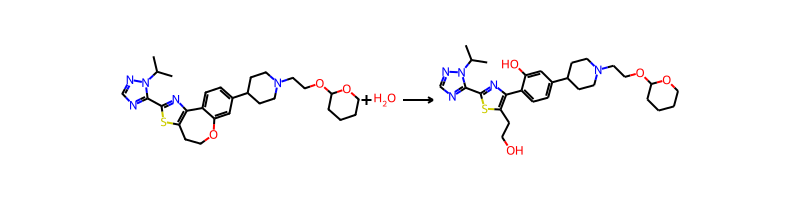

In [24]:
#Visualize negative reaction
# smi_de1= 'COC(=O)c1cccc(CON=C2CCN(S(=O)(=O)c3ccc(OC(F)(F)F)cc3)CC2)c1.O>>CO.O=C(O)c1cccc(CON=C2CCN(S(=O)(=O)c3ccc(OC(F)(F)F)cc3)CC2)c1'
smi_de1=data[79]['negative_reactions'][0]
reaction_de1=AllChem.ReactionFromSmarts(smi_de1,useSmiles=True)
Draw.ReactionToImage(reaction_de1)



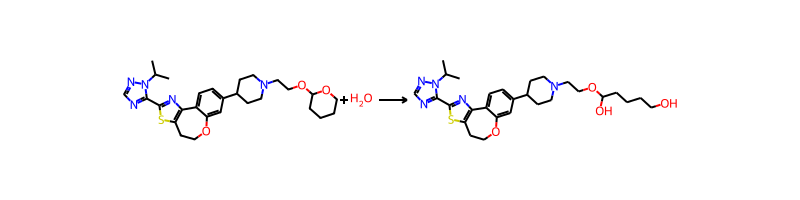

In [25]:
# smi_de2= 'COC(=O)c1cccc(CON=C2CCN(S(=O)(=O)c3ccc(OC(F)(F)F)cc3)CC2)c1.O>>CO.O=C(O)c1cccc(CON=C2CCN(S(=O)(=O)c3ccc(OC(F)(F)F)cc3)CC2)c1'
smi_de2=data[79]['negative_reactions'][1]
reaction_de2=AllChem.ReactionFromSmarts(smi_de2,useSmiles=True)
Draw.ReactionToImage(reaction_de2)

In [34]:
print(dct)
dct.keys()

{'ID': [15509, 10715, 1921, 24357, 21379, 4479, 4468, 10980, 26260, 3479, 47644, 4191, 8449, 42790, 7568, 26819, 25603, 20052, 47770, 39795, 6233, 19073, 18925, 43350, 35796, 31204, 48061, 22528, 44428, 2937, 8306, 29943, 30008, 33647, 21020, 2987, 11313, 18058, 44644, 45036, 10949, 5780, 26783, 982, 31640, 24137, 15112, 33669, 23002, 33869, 15294, 2394, 27354, 8189, 47645, 31740, 1641, 32066, 29163, 39961, 38111, 16113, 23319, 11989, 9494, 42854, 2140, 27683, 10988, 26142, 5605, 41510, 46052, 553, 4971, 15328, 13490, 6458, 30606, 41786, 45020, 28518, 22765, 6839, 28104, 12269, 44714, 36814, 37082, 34585, 149, 19263, 10252, 33095, 27940, 5229, 12789, 7288, 38390, 31651, 13248, 1452, 44013, 7717, 49204, 21381, 40127, 33217, 2383, 1881, 17626, 42222, 39767, 4242, 9353, 29107, 8960, 48697, 2227, 3217, 35549, 12442, 8444, 34420, 28112, 33359, 5926, 49098, 5202, 8307, 21221, 22574, 3922, 19331, 21554, 41178, 46529, 18769, 26418, 16464, 41469, 24915, 31714, 17136, 43757, 42500, 25975, 41524,

dict_keys(['ID', 'rxn', 'pro', 'de1', 'de2', 'idx'])

In [13]:
#Test pro1 de1
pro1_de1 = {'ID':[],'rxn':[],'pro':[],'de1':[],'de2':[],'idx':[]}

for idx,i in enumerate(dct['idx']):
    if len(dct['pro'][idx].split('.')) == 1 and len(dct['de1'][idx].split('.'))==1 and len(dct['de2'][idx].split('.'))==1:
        pro1_de1['ID'].append(dct['ID'][idx])
        pro1_de1['rxn'].append(dct['rxn'][idx])
        pro1_de1['pro'].append(dct['pro'][idx]) 
        pro1_de1['de1'].append(dct['de1'][idx])
        pro1_de1['de2'].append(dct['de2'][idx])
        # dct['de3'].append(i['negative_reactions'][2].split('>>')[1])
        pro1_de1['idx'].append(idx)

print(pro1_de1)
len(pro1_de1['ID'])

{'ID': [35549, 26943, 41711, 36550, 28521, 47091, 35592, 2536, 20568, 16556, 41366, 41379, 17454, 25769, 4106, 9849, 36960, 26414, 42711, 27670, 9799, 36619, 31823, 47685, 39056, 45298, 31996, 37511, 47240, 5782, 37513, 15254, 22212, 40287, 41959, 19634], 'rxn': ['CCOC(=O)COCCCCN1C(=O)CCCC1C=CC(=O)Cc1cccc(Cl)c1.[H][H]>>CCOC(=O)COCCCCN1C(=O)CCCC1C=CC(O)Cc1cccc(Cl)c1', 'CC1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(-n4ncc5cc(C(C)(C)C)cc(F)c5c4=O)c3C=O)cn(C)c2=O)nc1.[H][H]>>CC1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(-n4ncc5cc(C(C)(C)C)cc(F)c5c4=O)c3CO)cn(C)c2=O)nc1', 'CN=C=O.O=C(c1c(F)ccc(NS(=O)(=O)c2cc(F)ccc2F)c1F)c1c[nH]c2ncc(-c3ccc4[nH]ncc4c3)cc12>>CNC(=O)n1ncc2cc(-c3cnc4[nH]cc(C(=O)c5c(F)ccc(NS(=O)(=O)c6cc(F)ccc6F)c5F)c4c3)ccc21', 'CNC(=O)c1nc(-c2cccc(N)c2)cnc1N.O=C=NCc1ccccc1>>CNC(=O)c1nc(-c2cccc(NC(=O)NCc3ccccc3)c2)cnc1N', 'NC(=O)c1cc(-c2cccnc2C(Cc2cc(F)cc(F)c2)NC(=O)Cn2nc(C(F)(F)F)c3c2CC(=O)CC3)ccc1F.[H][H]>>NC(=O)c1cc(-c2cccnc2C(Cc2cc(F)cc(F)c2)NC(=O)Cn2nc(C(F)(F)F)c3c2CC(O)CC3)ccc1F', 'Cn1cc(-c

36

In [29]:
df_pro1_de1 = pd.DataFrame(pro1_de1) 
df_pro1_de1.columns
df_pro1_de1.head(5)

ID                                                rxn  \
0  35549  CCOC(=O)COCCCCN1C(=O)CCCC1C=CC(=O)Cc1cccc(Cl)c...   
1  26943  CC1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(-n4ncc5cc...   
2  41711  CN=C=O.O=C(c1c(F)ccc(NS(=O)(=O)c2cc(F)ccc2F)c1...   
3  36550  CNC(=O)c1nc(-c2cccc(N)c2)cnc1N.O=C=NCc1ccccc1>...   
4  28521  NC(=O)c1cc(-c2cccnc2C(Cc2cc(F)cc(F)c2)NC(=O)Cn...   

                                                 pro  \
0     CCOC(=O)COCCCCN1C(=O)CCCC1C=CC(O)Cc1cccc(Cl)c1   
1  CC1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(-n4ncc5cc...   
2  CNC(=O)n1ncc2cc(-c3cnc4[nH]cc(C(=O)c5c(F)ccc(N...   
3      CNC(=O)c1nc(-c2cccc(NC(=O)NCc3ccccc3)c2)cnc1N   
4  NC(=O)c1cc(-c2cccnc2C(Cc2cc(F)cc(F)c2)NC(=O)Cn...   

                                                 de1  \
0     CCOC(O)COCCCCN1C(=O)CCCC1C=CC(=O)Cc1cccc(Cl)c1   
1  CC1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(N4N=Cc5cc...   
2  CNC(=O)n1cc(C(=O)c2c(F)ccc(NS(=O)(=O)c3cc(F)cc...   
3      CNC(=O)c1nc(-c2cccc(N)c2)cnc1NC(=O)NCc1ccccc1   
4  NC(=O)c1cc(-c2cccnc2C(Cc2cc(F)cc(F)c2)NC(O)Cn2...   

                                                 de2  idx  
0     CCOC(=O)COCCCCN1C(O)CCCC1C=CC(=O)Cc1cccc(Cl)c1  120  
1  CC1CN(C2COC2)CCN1c1ccc(NC2=CC(c3ccnc(-n4ncc5cc...  302  
2  CNC(=O)N(c1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc5[n...  316  
3    CN(C(=O)NCc1ccccc1)C(=O)c1nc(-c2cccc(N)c2)cnc1N  335  
4  NC(O)c1cc(-c2cccnc2C(Cc2cc(F)cc(F)c2)NC(=O)Cn2...  352

In [ ]:
df_pro1_de1.loc

In [31]:
#Simi pro1 de1 (decoy)
# df_pro1_de1[['ID', 'de1', 'de2']] = df_pro1_de1['ID','de1','de2'].str.split(',', expand=True)
df_pro1_de1['Canon_de1'] = df_pro1_de1['de1'].apply(Chem.CanonSmiles)
df_pro1_de1['Canon_de2'] = df_pro1_de1['de2'].apply(Chem.CanonSmiles)
df_pro1_de1['Mol_de1'] = df_pro1_de1['Canon_de1'].apply(Chem.MolFromSmiles)
df_pro1_de1['Mol_de2'] = df_pro1_de1['Canon_de2'].apply(Chem.MolFromSmiles)
df_decoy =  df_pro1_de1.drop(['ID','de1','de2'], axis =1)

In [32]:
df_decoy.head(2)

rxn  \
0  CCOC(=O)COCCCCN1C(=O)CCCC1C=CC(=O)Cc1cccc(Cl)c...   
1  CC1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(-n4ncc5cc...   

                                                 pro  idx  \
0     CCOC(=O)COCCCCN1C(=O)CCCC1C=CC(O)Cc1cccc(Cl)c1  120   
1  CC1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(-n4ncc5cc...  302   

                                           Canon_de1  \
0     CCOC(O)COCCCCN1C(=O)CCCC1C=CC(=O)Cc1cccc(Cl)c1   
1  CC1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(N4N=Cc5cc...   

                                           Canon_de2  \
0     CCOC(=O)COCCCCN1C(O)CCCC1C=CC(=O)Cc1cccc(Cl)c1   
1  CC1CN(C2COC2)CCN1c1ccc(NC2=CC(c3ccnc(-n4ncc5cc...   

                                            Mol_de1  \
0  <rdkit.Chem.rdchem.Mol object at 0x76f446db8eb0>   
1  <rdkit.Chem.rdchem.Mol object at 0x76f446db9d20>   

                                            Mol_de2  
0  <rdkit.Chem.rdchem.Mol object at 0x76f446dbb220>  
1  <rdkit.Chem.rdchem.Mol object at 0x76f446dbb0d0>

In [39]:
#Product canon

df_pro = df_pro1_de1.drop(['ID','rxn','de1', 'de2', 'Canon_de1', 'Mol_de1', 'Canon_de2', 'Mol_de2'], axis =1)
df_pro['Canon_pro'] = df_pro['pro'].apply(Chem.CanonSmiles)
df_pro['Mol_pro'] = df_pro['Canon_pro'].apply(Chem.MolFromSmiles)
df_pro = df_pro.drop(['pro'], axis = 1)
df_pro.head(2)


idx                                          Canon_pro  \
0  120     CCOC(=O)COCCCCN1C(=O)CCCC1C=CC(O)Cc1cccc(Cl)c1   
1  302  CC1CN(C2COC2)CCN1c1ccc(Nc2cc(-c3ccnc(-n4ncc5cc...   

                                            Mol_pro  
0  <rdkit.Chem.rdchem.Mol object at 0x76f446948ac0>  
1  <rdkit.Chem.rdchem.Mol object at 0x76f44694aea0>

In [40]:
#Simi_pro1_de1
query = []
for _, idx, mol in df_pro[["idx", "Mol_pro"]].itertuples():
    mol.SetProp("_Name", idx)
    query.append(mol)
query[0]

ArgumentError: Python argument types in
    Mol.SetProp(Mol, str, int)
did not match C++ signature:
    SetProp(RDKit::ROMol self, char const* key, std::string val, bool computed=False)

In [41]:
for i in df_pro:
    simi = similarity_calculate(data = df_decoy, query= i, smile_col="Canon_de1", active_col='Active')
    simi.fit()
    # simi.plot()

ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMACCSKeysFingerprint(str)
did not match C++ signature:
    GetMACCSKeysFingerprint(RDKit::ROMol mol)

In [ ]:
#Simi pro1_de1
pro1_Canon = pro.apply(Chem.CanonSmiles)
pro1_mol= pro1_Canon.apply(Chem.MolFromSmiles)
lst_pro=[Chem.MolFromSmiles(Chem.CanonSmiles(i)) for i in pro]
lst_pro

In [2]:
# Active/decoy data

data[['ID', 'Active', 'SMILES']] = data['ID,Active,SMILES'].str.split(',', expand=True)
data['CanonSmiles'] = data['SMILES'].apply(Chem.CanonSmiles)
data['Molecule'] = data['CanonSmiles'].apply(Chem.MolFromSmiles)
data.drop(['ID,Active,SMILES', 'SMILES'], axis =1, inplace = True)
data.head(2)

ID Active                                        CanonSmiles  \
0  Active_1      1  CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...   
1  Active_2      1  CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...   

                                           Molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x7f51eaff8c80>  
1  <rdkit.Chem.rdchem.Mol object at 0x7f51eadc5c10>

In [3]:
# Query data
base_data = pd.read_csv('Data/similarity.csv')
base_data['CanonSmiles'] = base_data['smiles'].apply(Chem.CanonSmiles)
base_data['Molecule'] = base_data['CanonSmiles'].apply(Chem.MolFromSmiles)
base_data.drop(['smiles'], axis = 1, inplace = True)
base_data.head()

ID                                        CanonSmiles  \
0     CMF-019  CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...   
1     AMG 986  COc1cccc(OC)c1-n1c(NS(=O)(=O)[C@@H](C)[C@H](C)...   
2  BMS-986224  CCOCc1[nH]c(=O)c(-c2nnc(Cc3ccc(Cl)cn3)o2)c(O)c...   

                                           Molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x7f51ebb46890>  
1  <rdkit.Chem.rdchem.Mol object at 0x7f51ebb46430>  
2  <rdkit.Chem.rdchem.Mol object at 0x7f51ebb46270>

# 1. Similarity Calculation

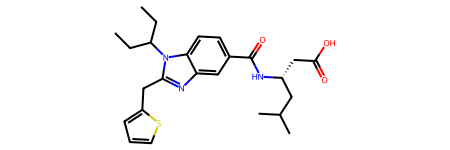

In [4]:
query = []
for _, idx, mol in base_data[["ID", "Molecule"]].itertuples():
    mol.SetProp("_Name", idx)
    query.append(mol)
query[0]

In [ ]:
for i in query:
    simi = similarity_calculate(data = data, query= i, smile_col="CanonSmiles", active_col='Active')
    simi.fit()
    simi.plot()

# 2. Enrichment plot

In [5]:
tani_col = ['tanimoto_avalon','tanimoto_maccs','tanimoto_ecfp2','tanimoto_ecfp4','tanimoto_ecfp6','tanimoto_map4',
 'tanimoto_fcfp2','tanimoto_fcfp4','tanimoto_fcfp6','tanimoto_rdk5','tanimoto_rdk6', 'tanimoto_rdk7',]

tanimoto_avalon


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_maccs


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_ecfp2


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_ecfp4


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_ecfp6


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_map4


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_fcfp2


% ranked dataset  % true actives identified
0          0.000022                        0.0
1          0.000044                        0.0
2          0.000066                        0.0
3          0.000088                        0.0
4          0.000111                        0.0

tanimoto_fcfp4


% ranked dataset  % true actives identified
0          0.000022                        0.0
1          0.000044                        0.0
2          0.000066                        0.0
3          0.000088                        0.0
4          0.000111                        0.0

tanimoto_fcfp6


% ranked dataset  % true actives identified
0          0.000022                        0.0
1          0.000044                        0.0
2          0.000066                        0.0
3          0.000088                        0.0
4          0.000111                        0.0

tanimoto_rdk5


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_rdk6


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_rdk7


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

Experimental EF for 1% of ranked dataset (tanimoto_avalon): 6.3%
Experimental EF for 1% of ranked dataset (tanimoto_maccs): 6.3%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp2): 14.7%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp4): 20.8%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp6): 24.1%
Experimental EF for 1% of ranked dataset (tanimoto_map4): 1.2%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp2): 0.0%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp4): 1.0%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp6): 0.9%
Experimental EF for 1% of ranked dataset (tanimoto_rdk5): 7.3%
Experimental EF for 1% of ranked dataset (tanimoto_rdk6): 8.8%
Experimental EF for 1% of ranked dataset (tanimoto_rdk7): 6.1%
Random EF for 1% of ranked dataset: 1.0%
Optimal EF for 1% of ranked dataset: 50.3%


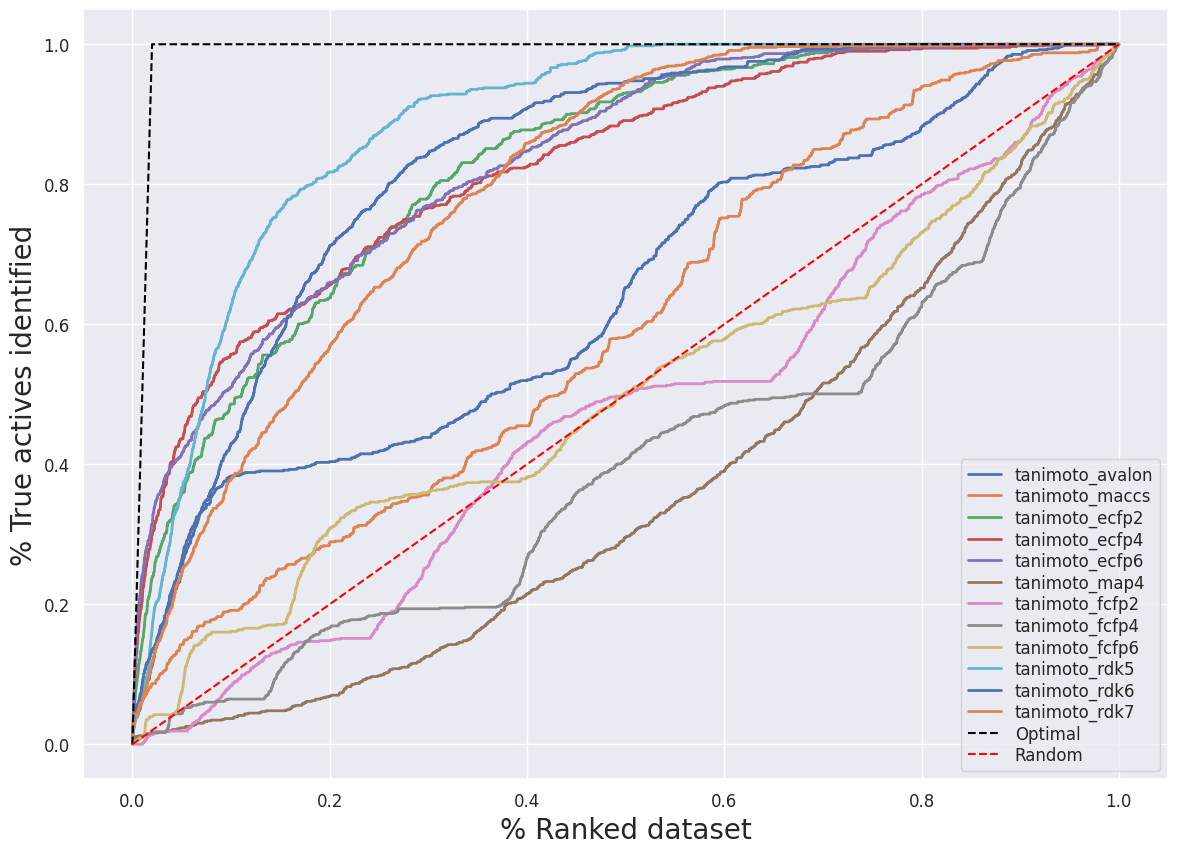

tanimoto_avalon


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_maccs


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_ecfp2


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_ecfp4


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_ecfp6


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_map4


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_fcfp2


% ranked dataset  % true actives identified
0          0.000022                        0.0
1          0.000044                        0.0
2          0.000066                        0.0
3          0.000088                        0.0
4          0.000111                        0.0

tanimoto_fcfp4


% ranked dataset  % true actives identified
0          0.000022                        0.0
1          0.000044                        0.0
2          0.000066                        0.0
3          0.000088                        0.0
4          0.000111                        0.0

tanimoto_fcfp6


% ranked dataset  % true actives identified
0          0.000022                        0.0
1          0.000044                        0.0
2          0.000066                        0.0
3          0.000088                        0.0
4          0.000111                        0.0

tanimoto_rdk5


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_rdk6


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_rdk7


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

Experimental EF for 1% of ranked dataset (tanimoto_avalon): 4.4%
Experimental EF for 1% of ranked dataset (tanimoto_maccs): 6.2%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp2): 18.7%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp4): 22.1%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp6): 23.1%
Experimental EF for 1% of ranked dataset (tanimoto_map4): 3.9%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp2): 0.3%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp4): 0.6%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp6): 1.1%
Experimental EF for 1% of ranked dataset (tanimoto_rdk5): 6.8%
Experimental EF for 1% of ranked dataset (tanimoto_rdk6): 3.9%
Experimental EF for 1% of ranked dataset (tanimoto_rdk7): 4.1%
Random EF for 1% of ranked dataset: 1.0%
Optimal EF for 1% of ranked dataset: 50.3%


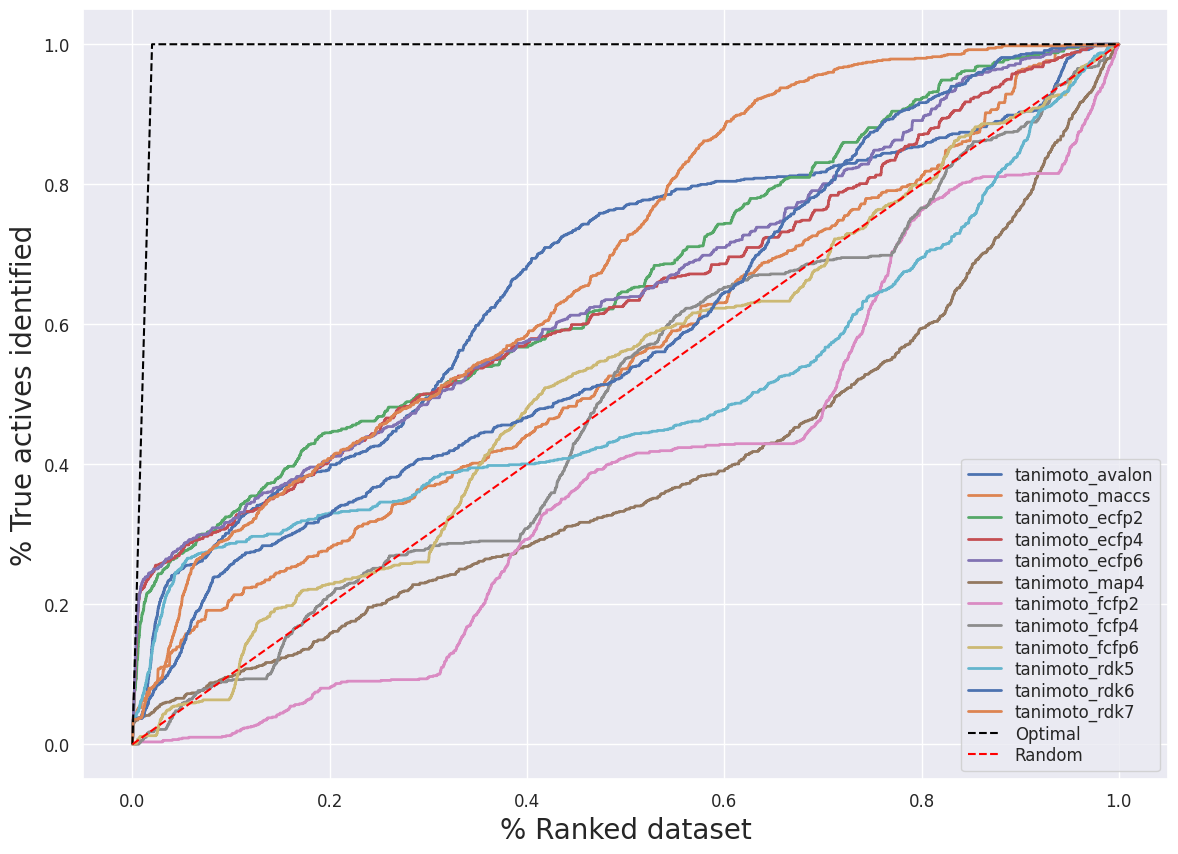

tanimoto_avalon


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_maccs


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_ecfp2


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_ecfp4


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_ecfp6


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_map4


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_fcfp2


% ranked dataset  % true actives identified
0          0.000022                        0.0
1          0.000044                        0.0
2          0.000066                        0.0
3          0.000088                        0.0
4          0.000111                        0.0

tanimoto_fcfp4


% ranked dataset  % true actives identified
0          0.000022                        0.0
1          0.000044                        0.0
2          0.000066                        0.0
3          0.000088                        0.0
4          0.000111                        0.0

tanimoto_fcfp6


% ranked dataset  % true actives identified
0          0.000022                        0.0
1          0.000044                        0.0
2          0.000066                        0.0
3          0.000088                        0.0
4          0.000111                        0.0

tanimoto_rdk5


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_rdk6


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

tanimoto_rdk7


% ranked dataset  % true actives identified
0          0.000022                   0.001112
1          0.000044                   0.002225
2          0.000066                   0.003337
3          0.000088                   0.004449
4          0.000111                   0.005562

Experimental EF for 1% of ranked dataset (tanimoto_avalon): 27.1%
Experimental EF for 1% of ranked dataset (tanimoto_maccs): 27.0%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp2): 28.6%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp4): 34.1%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp6): 34.8%
Experimental EF for 1% of ranked dataset (tanimoto_map4): 11.2%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp2): 0.1%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp4): 0.1%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp6): 0.1%
Experimental EF for 1% of ranked dataset (tanimoto_rdk5): 36.0%
Experimental EF for 1% of ranked dataset (tanimoto_rdk6): 35.2%
Experimental EF for 1% of ranked dataset (tanimoto_rdk7): 33.0%
Random EF for 1% of ranked dataset: 1.0%
Optimal EF for 1% of ranked dataset: 50.3%


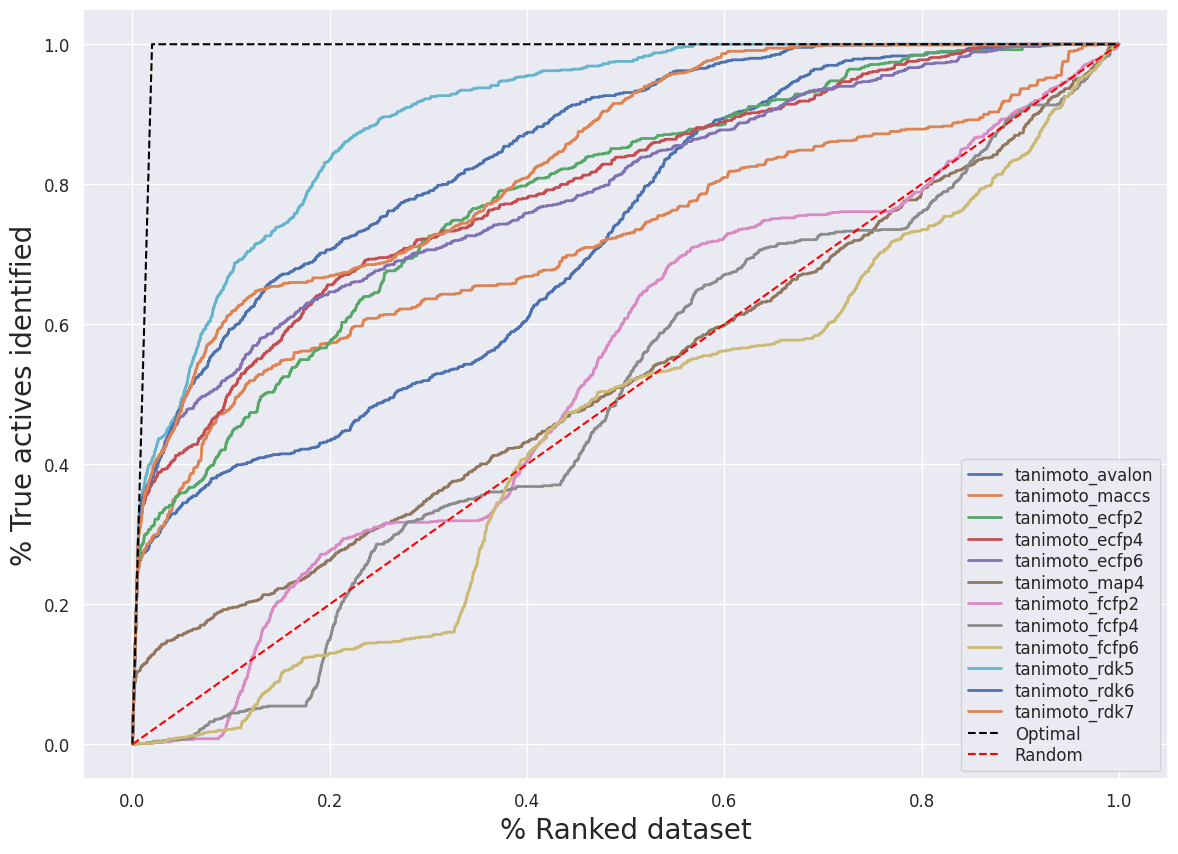

In [6]:
import glob
pBio_cutoff = .5
path = '/home/labhhc/Documents/Workspace/D18/TrucD18/Similarity/Data/Raw_data'
for i in glob.glob(f"{path}/*.csv"):
    data = pd.read_csv(i)
    data['Active']=data['Active'].astype('float')
    ef = Enrichment_Factor(data = data,similarity_measure= tani_col, pBio_cutoff=pBio_cutoff, 
                       active_col = 'Active', ranked_dataset_percentage_cutoff = 1
                      )
    ef.EF()
    ef.EF_calculate()
    ef.plot_EF()

# 3. Validation

<Figure size 1400x1000 with 0 Axes>

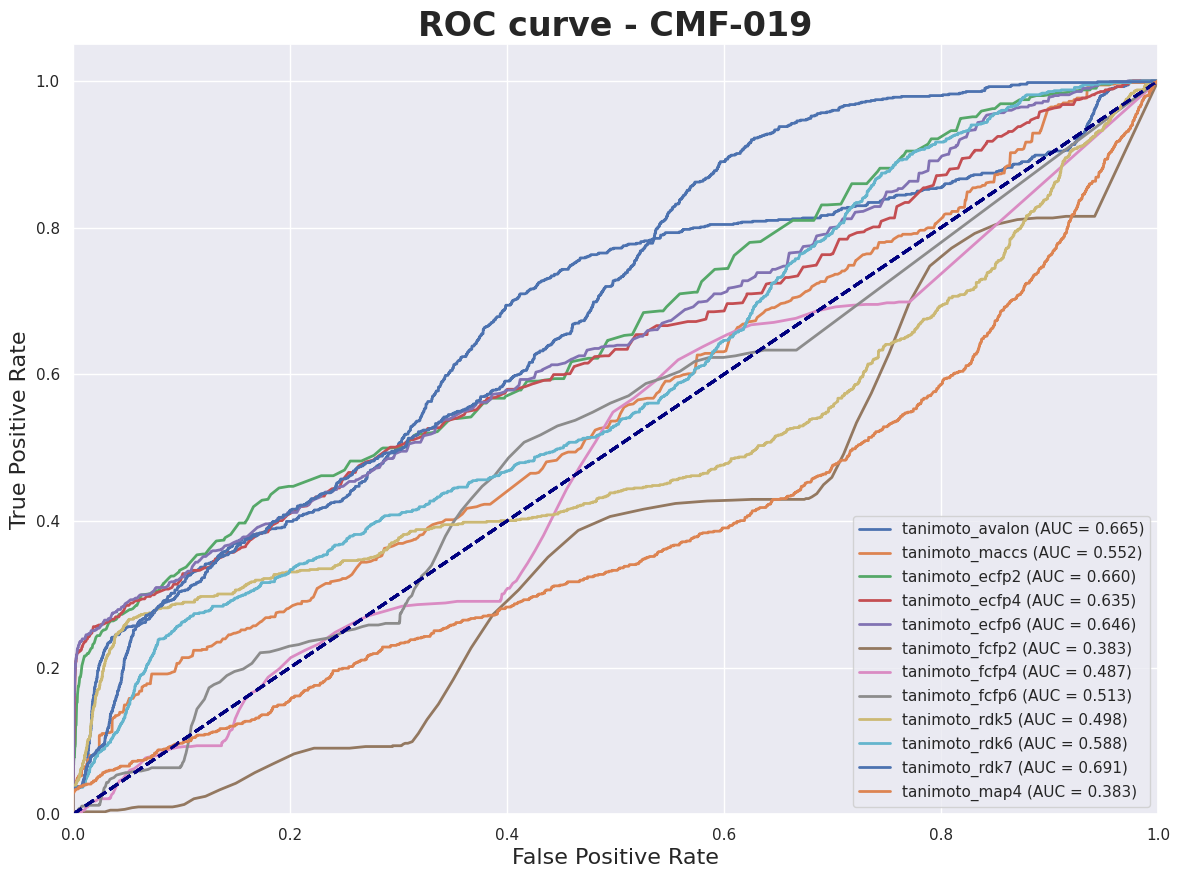

<Figure size 1400x1000 with 0 Axes>

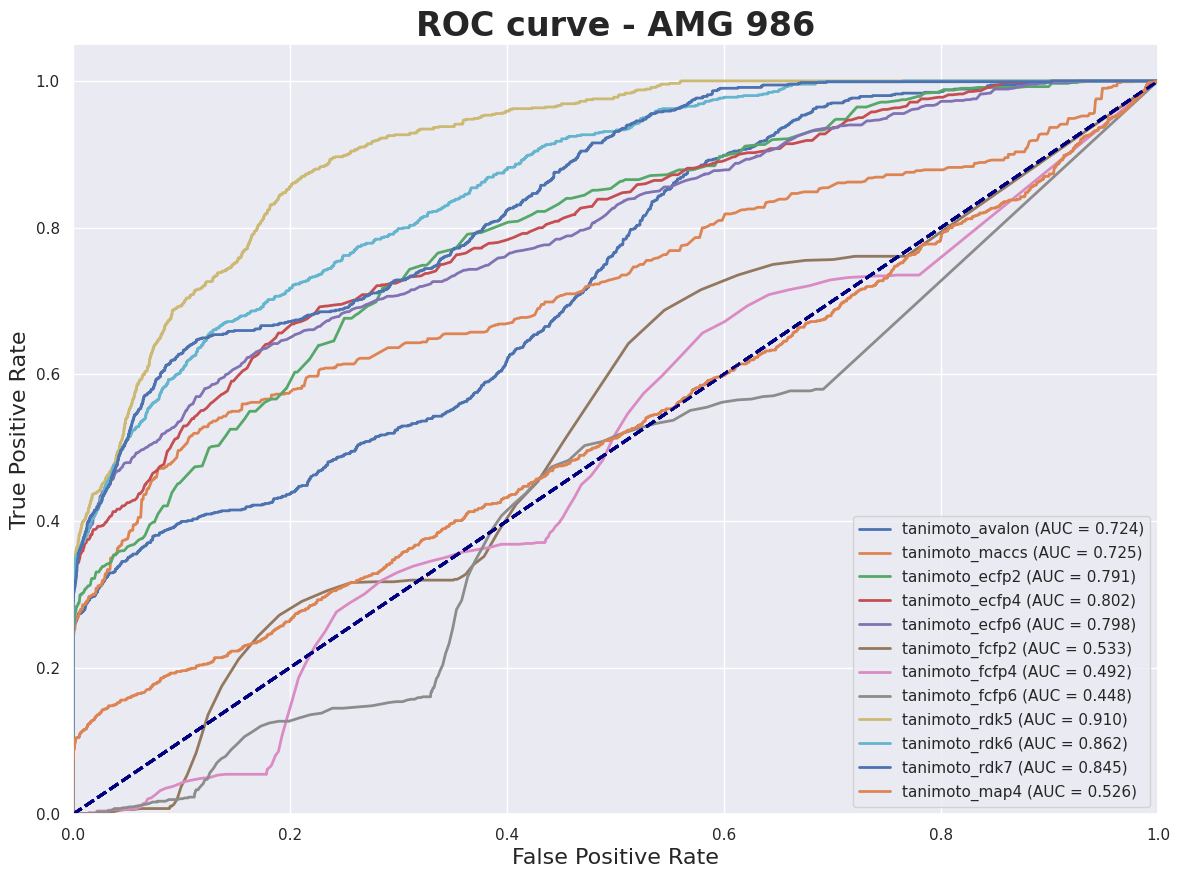

<Figure size 1400x1000 with 0 Axes>

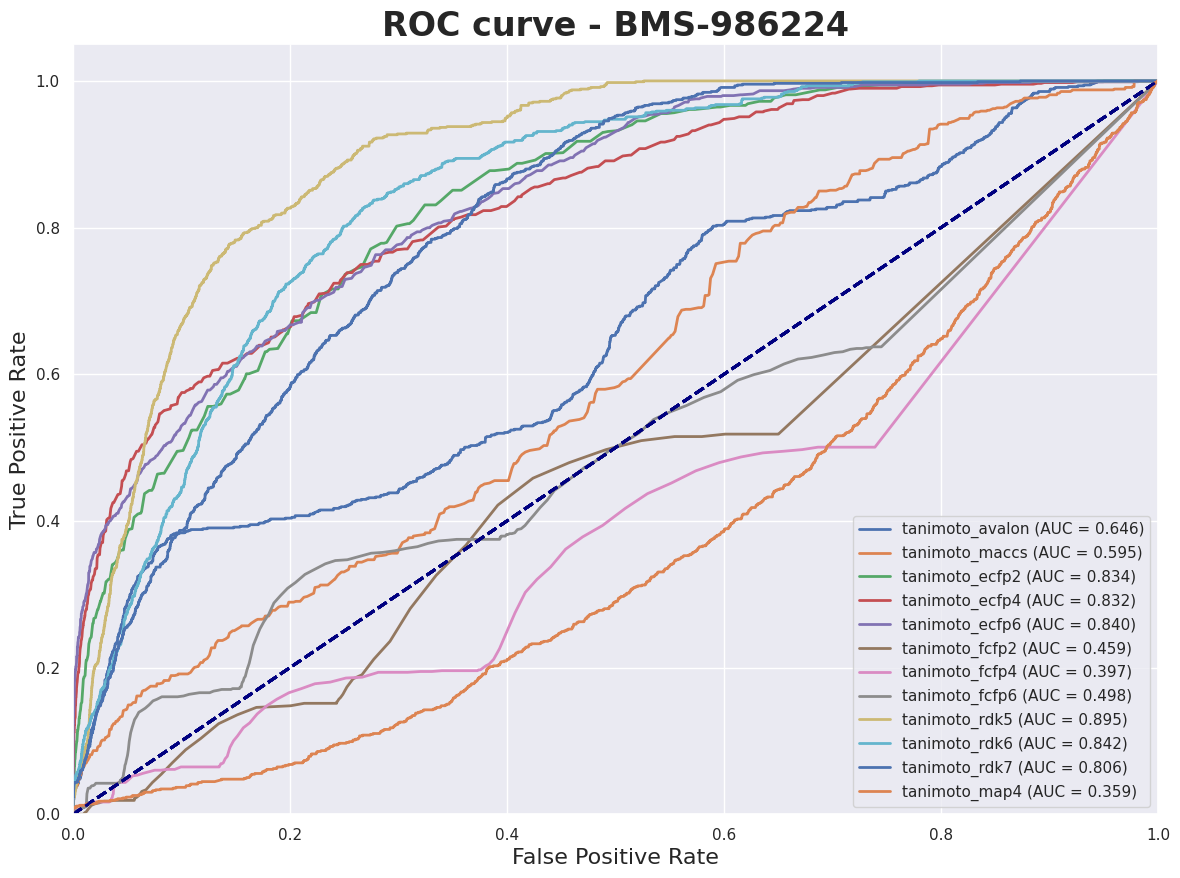

In [7]:
path = '/home/labhhc/Documents/Workspace/D18/TrucD18/Similarity/Data/Raw_data'
for i in query:
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    valid = similarity_validation(data, active_col = 'Active', scores = 'tanimoto',plot_type = 'roc', figsize = (14,10), query =i )
    valid.validation()
    valid.visualize()

# 4. Cross-validation

## 4.1. Compare 12 fingerprint for 3 data sets

In [174]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.metrics import accuracy_score, make_scorer

from significantplot import sign_array, sign_table, sign_plot
import seaborn as sns
import matplotlib.pyplot as plt
def GH_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)
    GH = (0.75*precision + 0.25*recall)*specificity
    return GH

GH_scoring = make_scorer(GH_score, greater_is_better=True)
col = ['Active','tanimoto_avalon',
 'tanimoto_maccs',
 'tanimoto_ecfp2',
 'tanimoto_ecfp4',
 'tanimoto_ecfp6',
 'tanimoto_fcfp2',
 'tanimoto_fcfp4',
 'tanimoto_fcfp6',
 'tanimoto_rdk5',
 'tanimoto_rdk6',
 'tanimoto_rdk7',
 'tanimoto_map4']

In [112]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
path = '/home/labhhc/Documents/Workspace/D18/TrucD18/Similarity/Data/Raw_data'
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
QUERY = []
list_AUC = []
list_F1 = []
list_GH = []

for i in query:
    QUERY.append(i)
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    data = data[col]
    data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, stratify = data.Active)
    for train_index, test_index in cv.split(data_train.drop(['Active'], axis =1), data_train['Active']):
        list_auc = []
        list_f1 = []
        list_gh = []
        model = []
        test = data_train.iloc[test_index,:]
        for i in col[1:]:
            model.append(i)
            fpr, tpr, _ = roc_curve(test['Active'], test[i])
            roc_auc = round(auc(fpr, tpr),3)
            list_auc.append(roc_auc)
            f1 = f1_score(test['Active'].values, test[i].round())
            list_f1.append(f1)
            gh = GH_score(test['Active'].values, test[i].round())
            list_gh.append(gh)
        list_AUC.append(list_auc)
        list_F1.append(list_f1)
        list_GH.append(list_gh)

In [127]:
AUC = pd.DataFrame(list_AUC, columns = model)
F1 = pd.DataFrame(list_F1, columns = model)
GH = pd.DataFrame(list_GH, columns = model)

In [182]:
CMF_019 = AUC.iloc[:30,:].reset_index(drop=True)
AMG_986 = AUC.iloc[30:60,:].reset_index(drop=True)
BMS_986224 = AUC.iloc[60:,:].reset_index(drop=True)

In [168]:
CMF_019.mean()

tanimoto_avalon    0.655067
tanimoto_maccs     0.549067
tanimoto_ecfp2     0.650667
tanimoto_ecfp4     0.624700
tanimoto_ecfp6     0.639200
tanimoto_fcfp2     0.390367
tanimoto_fcfp4     0.483633
tanimoto_fcfp6     0.512267
tanimoto_rdk5      0.491367
tanimoto_rdk6      0.585900
tanimoto_rdk7      0.689667
tanimoto_map4      0.373433
dtype: float64

(<AxesSubplot: title={'center': 'AUC-Wilcoxon - CMF-019'}>,
 <matplotlib.colorbar.Colorbar at 0x7f51d80710d0>)

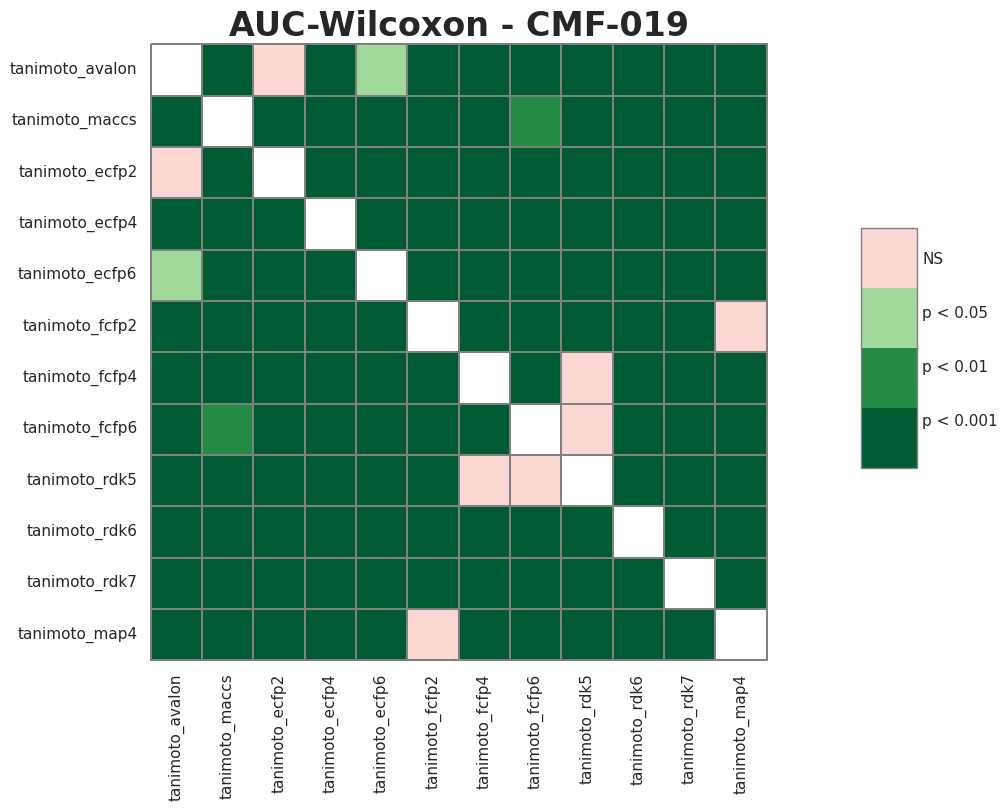

In [166]:
df_melt = pd.melt(CMF_019.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (14,8))
plt.title("AUC-Wilcoxon - CMF-019", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)

In [169]:
AMG_986.mean()

tanimoto_avalon    0.728033
tanimoto_maccs     0.732933
tanimoto_ecfp2     0.795167
tanimoto_ecfp4     0.808233
tanimoto_ecfp6     0.803533
tanimoto_fcfp2     0.535367
tanimoto_fcfp4     0.489800
tanimoto_fcfp6     0.440100
tanimoto_rdk5      0.914033
tanimoto_rdk6      0.867633
tanimoto_rdk7      0.853633
tanimoto_map4      0.529367
dtype: float64

(<AxesSubplot: title={'center': 'AUC-Wilcoxon - AMG_986'}>,
 <matplotlib.colorbar.Colorbar at 0x7f51d7fbe7f0>)

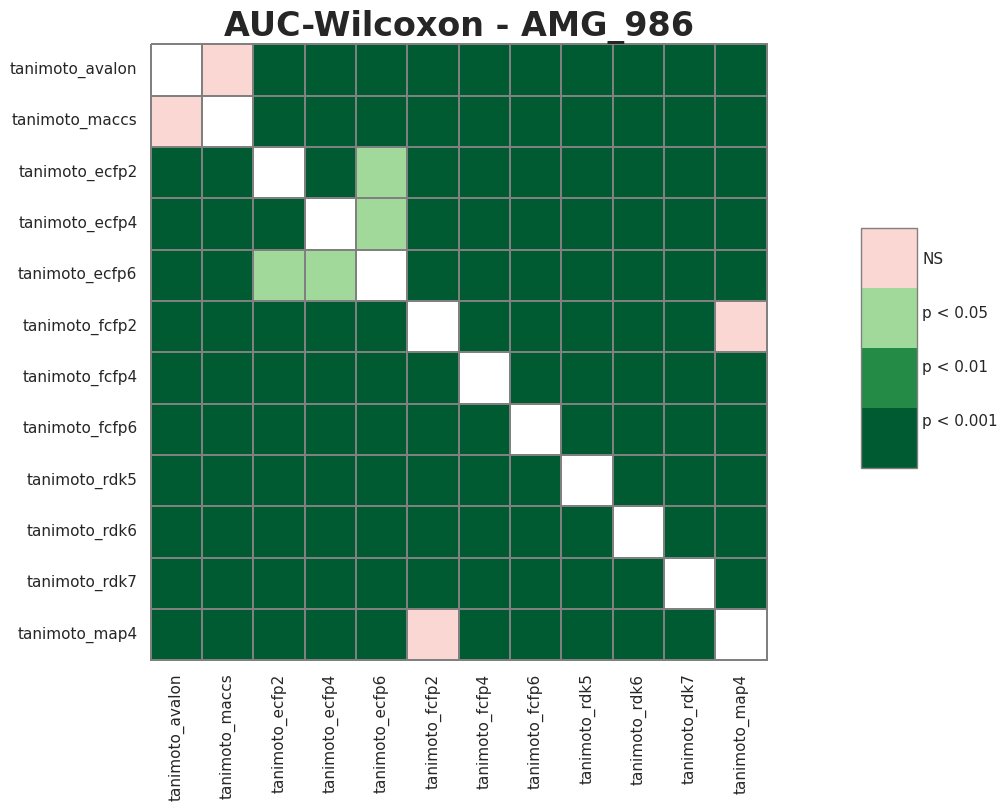

In [170]:
df_melt = pd.melt(AMG_986.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (14,8))
plt.title("AUC-Wilcoxon - AMG_986", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)

In [171]:
BMS_986224.mean()

tanimoto_avalon    0.647567
tanimoto_maccs     0.600633
tanimoto_ecfp2     0.835000
tanimoto_ecfp4     0.831767
tanimoto_ecfp6     0.839733
tanimoto_fcfp2     0.459333
tanimoto_fcfp4     0.400933
tanimoto_fcfp6     0.504367
tanimoto_rdk5      0.897267
tanimoto_rdk6      0.846867
tanimoto_rdk7      0.811567
tanimoto_map4      0.357133
dtype: float64

(<AxesSubplot: title={'center': 'AUC-Wilcoxon - BMS_986224'}>,
 <matplotlib.colorbar.Colorbar at 0x7f51d7e96d60>)

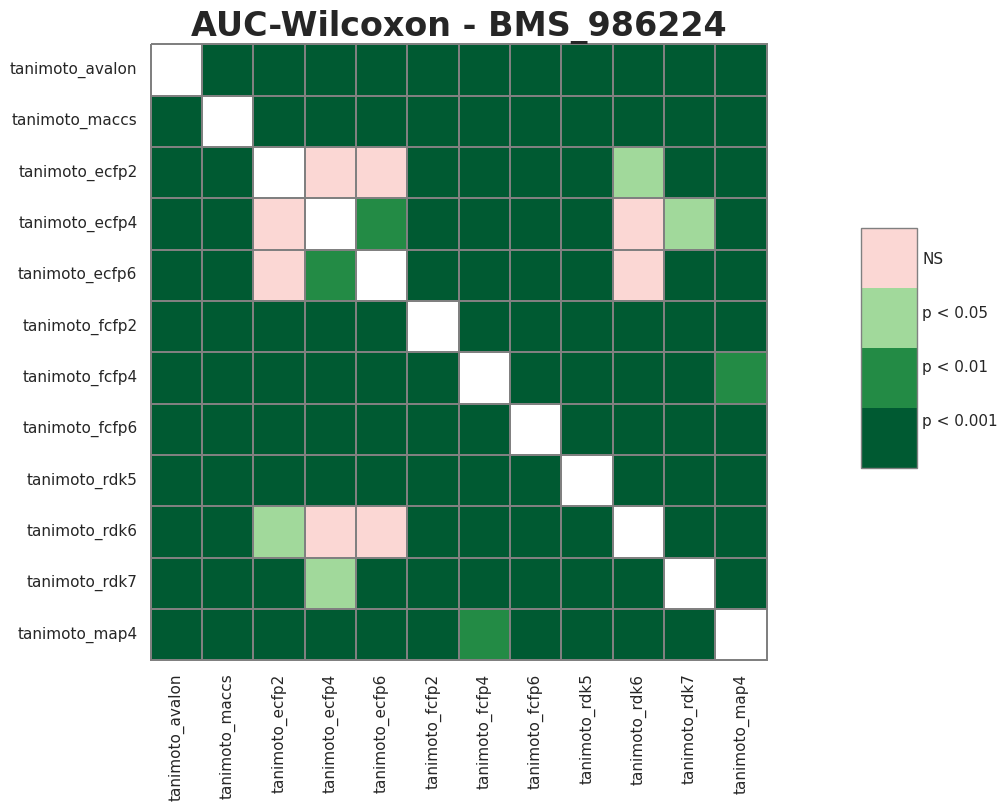

In [172]:
df_melt = pd.melt(BMS_986224.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (14,8))
plt.title("AUC-Wilcoxon - BMS_986224", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)

In [187]:
index = ['CMF_019_rdk7', 'AMG_986_rdk5', 'BMS_986224_rdk5']
list_compare = []
list_compare.append(CMF_019['tanimoto_rdk7'])
list_compare.append(AMG_986['tanimoto_rdk5'])
list_compare.append(BMS_986224['tanimoto_rdk5'])

In [193]:
df_compare = pd.DataFrame(list_compare, index = index).T

In [212]:
df_compare.columns

Index(['CMF_019_rdk7', 'AMG_986_rdk5', 'BMS_986224_rdk5'], dtype='object')

CMF_019_rdk7 vs. AMG_986_rdk5: Custom statistical test, P_val:1.863e-09
AMG_986_rdk5 vs. BMS_986224_rdk5: Custom statistical test, P_val:6.918e-06
CMF_019_rdk7 vs. BMS_986224_rdk5: Custom statistical test, P_val:1.863e-09


Text(0.5, 1.0, 'Stacking Method Comparision - Wilcoxon test')

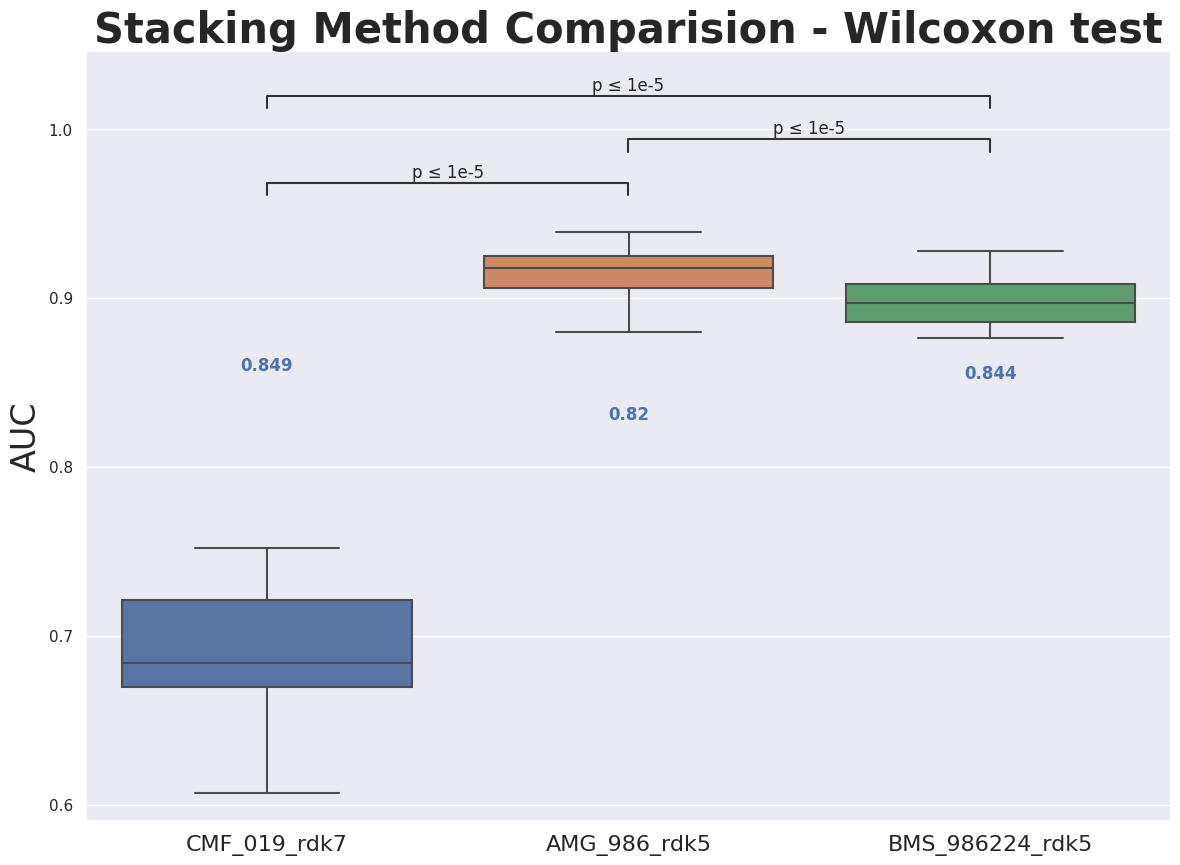

In [219]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_compare.reset_index(), id_vars=['index'], value_vars=df_compare.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_compare['CMF_019_rdk7'].astype('float'), df_compare['AMG_986_rdk5'].astype('float'), alternative="two-sided"),
                wilcoxon(df_compare['AMG_986_rdk5'].astype('float'), df_compare['BMS_986224_rdk5'].astype('float'), alternative="two-sided"),
                wilcoxon(df_compare['CMF_019_rdk7'].astype('float'), df_compare['BMS_986224_rdk5'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('CMF_019_rdk7', 'AMG_986_rdk5'),
         ('AMG_986_rdk5','BMS_986224_rdk5'),
         ('CMF_019_rdk7','BMS_986224_rdk5'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)


mean = list()
result = df_compare.values
for i in range(len(result)):
    x = result[i].mean().round(3)
    mean.append(x)
data = np.array(mean)   
ser = pd.Series(data, index =df_compare.index)


dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.01

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='b',weight='semibold', fontsize = 12)
    

ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_compare.columns, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
#plt.savefig("/home/labhhc/Documents/Workspace/D18/TrucD18/stacking/Stacking AUC- cps25 - Wilocoxon.png", dpi = 600)

## 4.2. Fingerprint

In [221]:
AUC.mean()

tanimoto_avalon    0.676889
tanimoto_maccs     0.627544
tanimoto_ecfp2     0.760278
tanimoto_ecfp4     0.754900
tanimoto_ecfp6     0.760822
tanimoto_fcfp2     0.461689
tanimoto_fcfp4     0.458122
tanimoto_fcfp6     0.485578
tanimoto_rdk5      0.767556
tanimoto_rdk6      0.766800
tanimoto_rdk7      0.784956
tanimoto_map4      0.419978
dtype: float64

(<AxesSubplot: title={'center': 'AUC -Wilcoxon'}>,
 <matplotlib.colorbar.Colorbar at 0x7f51d5fe9850>)

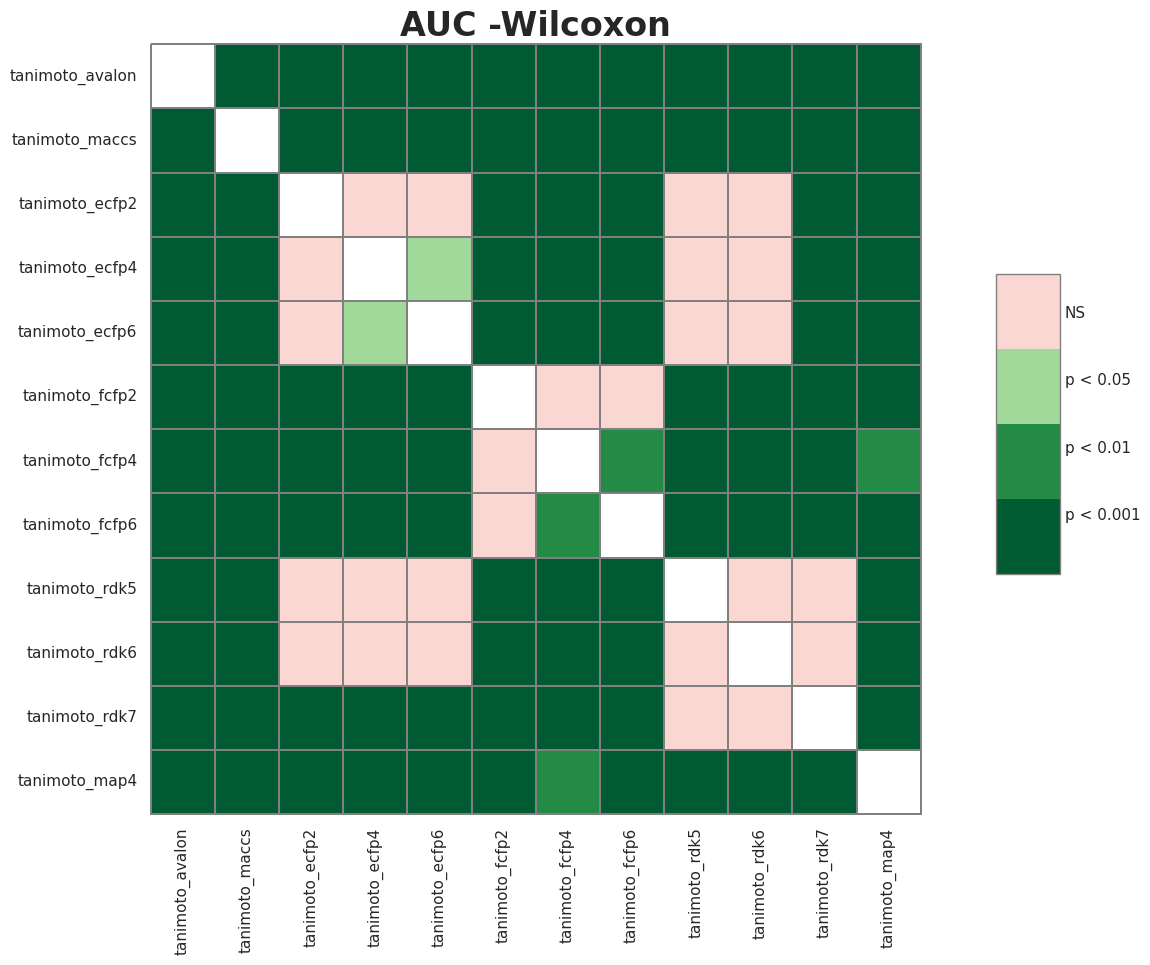

In [222]:
df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (16,10))
plt.title("AUC -Wilcoxon", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)

## 4.3. Ensemble

In [ ]:
from rdkit import Chem, DataStructs
ensemble=[]
cp = []
for i in query:
    cp.append(i.GetProp("_Name"))
    fp = Chem.RDKFingerprint(i, maxPath=7, fpSize=4096, nBitsPerHash=2)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    ensemble.append(ar)
    
df_ensemble  =pd.DataFrame(ensemble, index = cp).T
df_ensemble

CMF-019  AMG 986  BMS-986224
0           0        0           1
1           1        0           1
2           0        1           1
3           0        1           0
4           0        1           0
...       ...      ...         ...
4091        0        1           1
4092        0        0           0
4093        0        1           1
4094        0        0           0
4095        0        0           1

[4096 rows x 3 columns]

In [244]:
df_ensemble['CHA-1'].sum()

1465.0

In [245]:
df_ensemble['CHA'] = df_ensemble.sum(axis=1)

df_ensemble['CHA-1'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-1'][df_ensemble['CHA']>=1] =1

df_ensemble['CHA-2'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-2'][df_ensemble['CHA']>=2] =1

df_ensemble['CHA-3'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-3'][df_ensemble['CHA']>=3] =1

In [246]:
df_ensemble

CMF-019  AMG 986  BMS-986224  CHA  CHA-1  CHA-2  CHA-3
0           0        0           1  2.0    1.0    1.0    0.0
1           1        0           1  5.0    1.0    1.0    1.0
2           0        1           1  5.0    1.0    1.0    1.0
3           0        1           0  2.0    1.0    1.0    0.0
4           0        1           0  2.0    1.0    1.0    0.0
...       ...      ...         ...  ...    ...    ...    ...
4091        0        1           1  5.0    1.0    1.0    1.0
4092        0        0           0  0.0    0.0    0.0    0.0
4093        0        1           1  5.0    1.0    1.0    1.0
4094        0        0           0  0.0    0.0    0.0    0.0
4095        0        0           1  2.0    1.0    1.0    0.0

[4096 rows x 7 columns]

In [243]:
df_ensemble['CHA-1'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-1'][df_ensemble['CHA']>1] =1

In [ ]:
def ensemble_fp(self):
        
        # Ensemble

     
        self.active_data['fp'] = self.active_data[self.mol_col].apply(self.mol2ecfp)
        X = np.stack(self.active_data['fp'])
        self.df_ensemble = pd.DataFrame()
        
        for i in range(X.shape[0]):
            en_fp = X.sum(axis = 0)
            en_fp[en_fp > i] = 1

            arr_tostring = "".join(en_fp.astype(str))
            arr_tostring

            # Chuyển string của 0, 1 thành ExplicitVBitVect, cái này cũng dùng cho tanimoto được luôn
            EBitVect = DataStructs.cDataStructs.CreateFromBitString(arr_tostring)
            df_EBitVect = pd.DataFrame([EBitVect])
            df_EBitVect.columns = [f'Ensemble_{i}']
            self.df_ensemble = pd.concat([self.df_ensemble,df_EBitVect.T], axis=0)
        
        self.df_ensemble.columns = ['Ensemble method']
        self.df_ensemble['ID'] = self.df_ensemble.index

In [234]:
for i in range(X.shape[0]):
            en_fp = X.sum(axis = 0)
            en_fp[en_fp > i] = 1

            arr_tostring = "".join(en_fp.astype(str))
            arr_tostring

            # Chuyển string của 0, 1 thành ExplicitVBitVect, cái này cũng dùng cho tanimoto được luôn
            EBitVect = DataStructs.cDataStructs.CreateFromBitString(arr_tostring)
            df_EBitVect = pd.DataFrame([EBitVect])
            df_EBitVect.columns = [f'Ensemble_{i}']
            self.df_ensemble = pd.concat([self.df_ensemble,df_EBitVect.T], axis=0)
        
        self.df_ensemble.columns = ['Ensemble method']
        self.df_ensemble['ID'] = self.df_ensemble.index

In [ ]:
rdk7_query = Chem.RDKFingerprint(self.query, maxPath=7, fpSize=4096, nBitsPerHash=2)

In [ ]:
 def ensemble_fp():
        
        # Ensemble

     
        self.active_data['fp'] = self.active_data['ROMol'].apply(self.mol2ecfp)
        X = np.stack(self.active_data['fp'])
        self.df_ensemble = pd.DataFrame()
        
        for i in range(X.shape[0]):
            en_fp = X.sum(axis = 0)
            en_fp[en_fp > i] = 1

            arr_tostring = "".join(en_fp.astype(str))
            arr_tostring

            # Chuyển string của 0, 1 thành ExplicitVBitVect, cái này cũng dùng cho tanimoto được luôn
            EBitVect = DataStructs.cDataStructs.CreateFromBitString(arr_tostring)
            df_EBitVect = pd.DataFrame([EBitVect])
            df_EBitVect.columns = [f'Ensemble_{i}']
            self.df_ensemble = pd.concat([self.df_ensemble,df_EBitVect.T], axis=0)
        
        self.df_ensemble.columns = ['Ensemble method']
        self.df_ensemble['ID'] = self.df_ensemble.index

# 5. Stacking

In [251]:
from sklearn.model_selection import cross_val_score
import numpy as np 
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
clf = XGBClassifier(random_state=42)

In [252]:
model = []
list_auc = []
list_f1 = []
list_GH = []
list_recall = []
path = '/home/labhhc/Documents/Workspace/D18/TrucD18/Similarity/Data/Raw_data'
for i in query:
    clf = XGBClassifier(random_state=42)
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    data = data[col]
    display(data.head(2))
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['Active'], axis = 1), 
                                                    data.Active, test_size=0.2, random_state=42, stratify = data.Active)
    
    auc= cross_val_score(clf, X_train, y_train, cv=cv, scoring ='roc_auc')
    list_auc.append(auc)

    f1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring ='f1')
    list_f1.append(f1)
    
    recall = cross_val_score(clf, X_train, y_train, cv=cv, scoring ='recall')
    list_recall.append(recall)
    
    GH = cross_val_score(clf, X_train, y_train, cv=cv, scoring =GH_scoring)
    list_GH.append(GH)
    
    model.append(i.GetProp('_Name'))


Active  tanimoto_avalon  tanimoto_maccs  tanimoto_ecfp2  tanimoto_ecfp4  \
0       1         0.874667        0.859375        0.680851        0.554217   
1       1         0.973837        0.883333        0.790698        0.763889   

   tanimoto_ecfp6  tanimoto_fcfp2  tanimoto_fcfp4  tanimoto_fcfp6  \
0        0.441667        0.045455        0.017241        0.012739   
1        0.717172        0.046875        0.017544        0.026316   

   tanimoto_rdk5  tanimoto_rdk6  tanimoto_rdk7  tanimoto_map4  
0       0.947826       0.929319       0.908575       0.535484  
1       0.988713       0.976744       0.966343       0.838870

Active  tanimoto_avalon  tanimoto_maccs  tanimoto_ecfp2  tanimoto_ecfp4  \
0       1         0.406015        0.423913        0.190476        0.106195   
1       1         0.379048        0.388889        0.177419        0.098214   

   tanimoto_ecfp6  tanimoto_fcfp2  tanimoto_fcfp4  tanimoto_fcfp6  \
0        0.075472        0.030303        0.008772        0.006173   
1        0.076923        0.031250        0.008929        0.012658   

   tanimoto_rdk5  tanimoto_rdk6  tanimoto_rdk7  tanimoto_map4  
0       0.198582       0.284733       0.257212       0.431844  
1       0.197842       0.273287       0.252649       0.409420

Active  tanimoto_avalon  tanimoto_maccs  tanimoto_ecfp2  tanimoto_ecfp4  \
0       1         0.375000        0.453488        0.179104        0.110169   
1       1         0.355805        0.451220        0.184615        0.112069   

   tanimoto_ecfp6  tanimoto_fcfp2  tanimoto_fcfp4  tanimoto_fcfp6  \
0        0.093168        0.028571             0.0        0.011976   
1        0.074534        0.014493             0.0        0.006061   

   tanimoto_rdk5  tanimoto_rdk6  tanimoto_rdk7  tanimoto_map4  
0       0.200237       0.279346       0.264028       0.450057  
1       0.196643       0.270068       0.252914       0.449631

In [253]:
AUC = pd.DataFrame(list_auc, index =  model).T
F1 = pd.DataFrame(list_f1, index =  model).T
GH = pd.DataFrame(list_GH, index =  model).T
RECALL = pd.DataFrame(list_recall, index =  model).T

CMF-019 vs. AMG 986: Custom statistical test, P_val:9.301e-03
AMG 986 vs. BMS-986224: Custom statistical test, P_val:4.971e-02
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.639e-07


Text(0.5, 1.0, 'Stacking Method Comparision - Wilcoxon test')

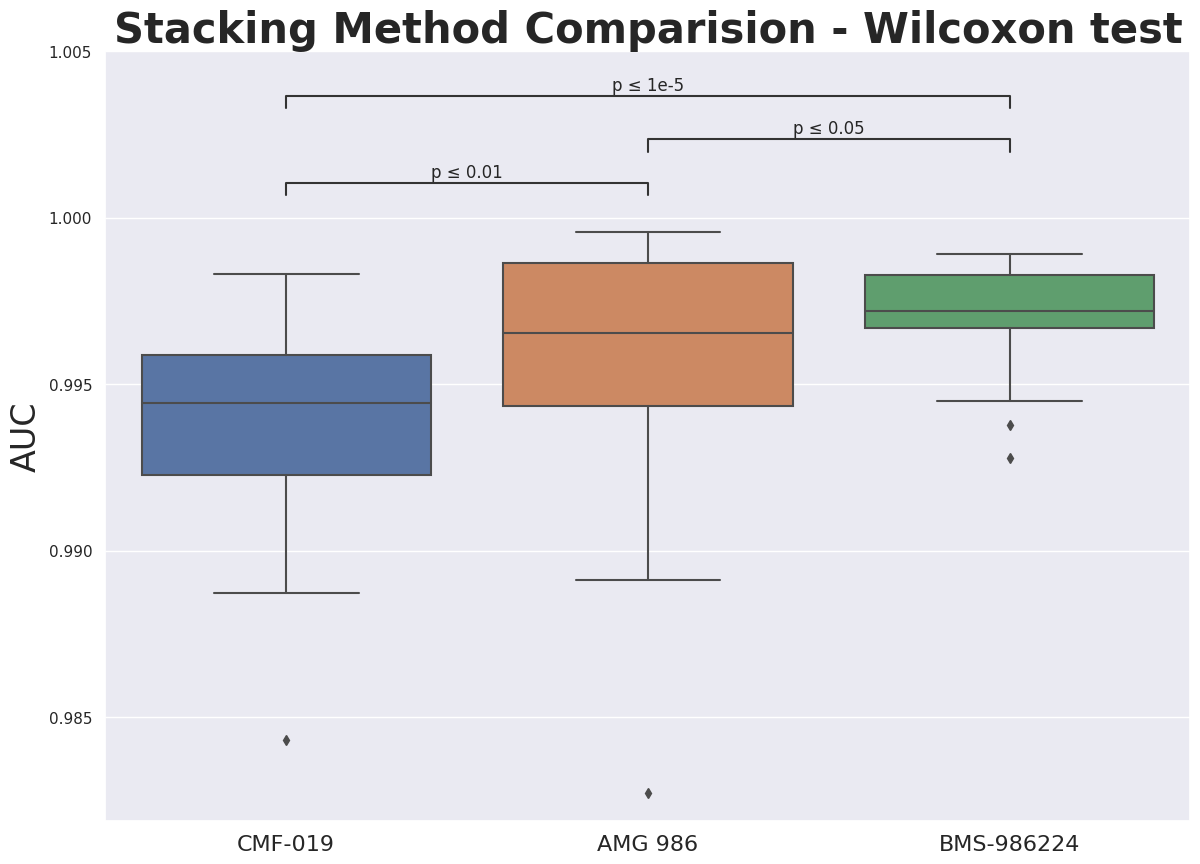

In [254]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(AUC['CMF-019'].astype('float'), AUC['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC['AMG 986'].astype('float'), AUC['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC['CMF-019'].astype('float'), AUC['BMS-986224'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
#plt.savefig("/home/labhhc/Documents/Workspace/D18/TrucD18/stacking/Stacking AUC- cps25 - Wilocoxon.png", dpi = 600)

CMF-019 vs. AMG 986: Custom statistical test, P_val:1.304e-07
AMG 986 vs. BMS-986224: Custom statistical test, P_val:3.044e-01
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.863e-09


Text(0.5, 1.0, 'Stacking Method Comparision - Wilcoxon test')

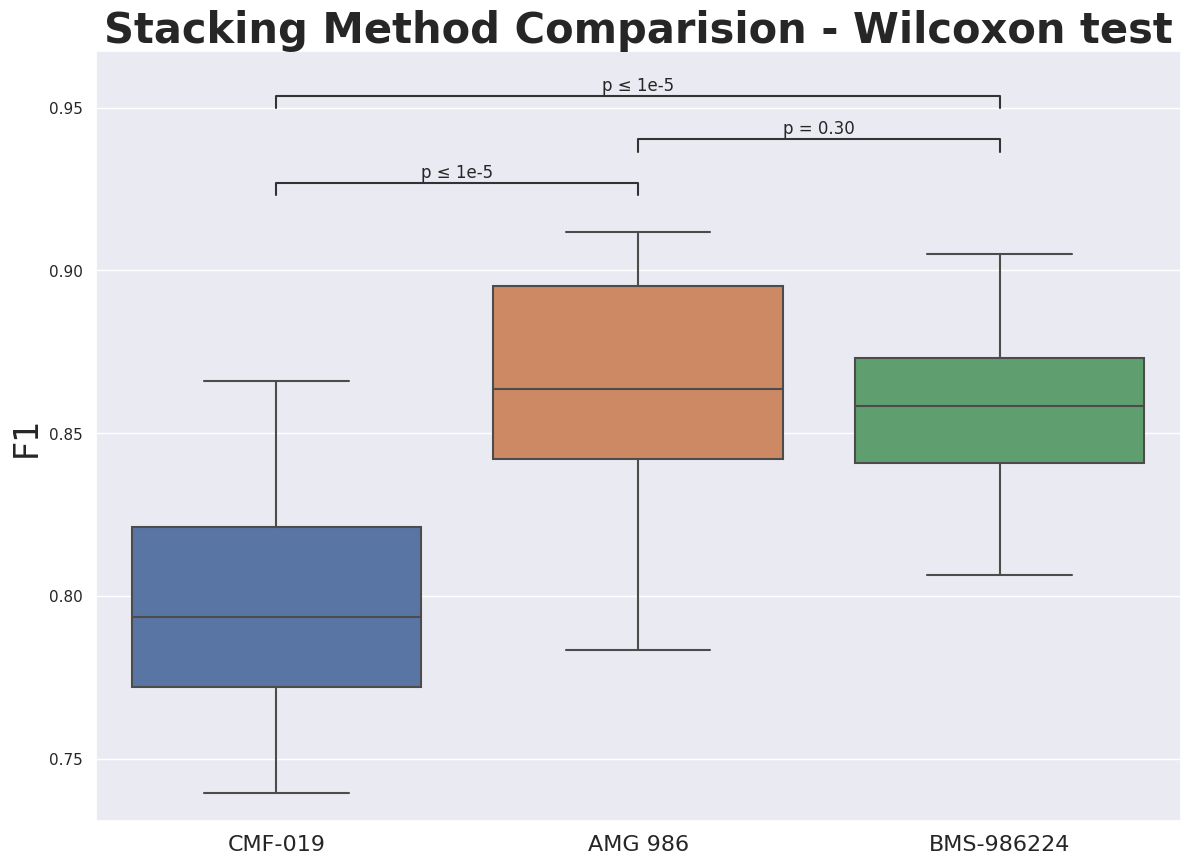

In [256]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(F1.reset_index(), id_vars=['index'], value_vars=F1.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(F1['CMF-019'].astype('float'), F1['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(F1['AMG 986'].astype('float'), F1['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(F1['CMF-019'].astype('float'), F1['BMS-986224'].astype('float'), alternative="two-sided"),
                
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'F1',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='F1', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('F1', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
#plt.savefig("/home/labhhc/Documents/Workspace/D18/TrucD18/stacking/Stacking AUC- cps25 - Wilocoxon.png", dpi = 600)

CMF-019 vs. AMG 986: Custom statistical test, P_val:1.192e-06
AMG 986 vs. BMS-986224: Custom statistical test, P_val:3.044e-01
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.061e-05


Text(0.5, 1.0, 'Stacking Method Comparision - Wilcoxon test')

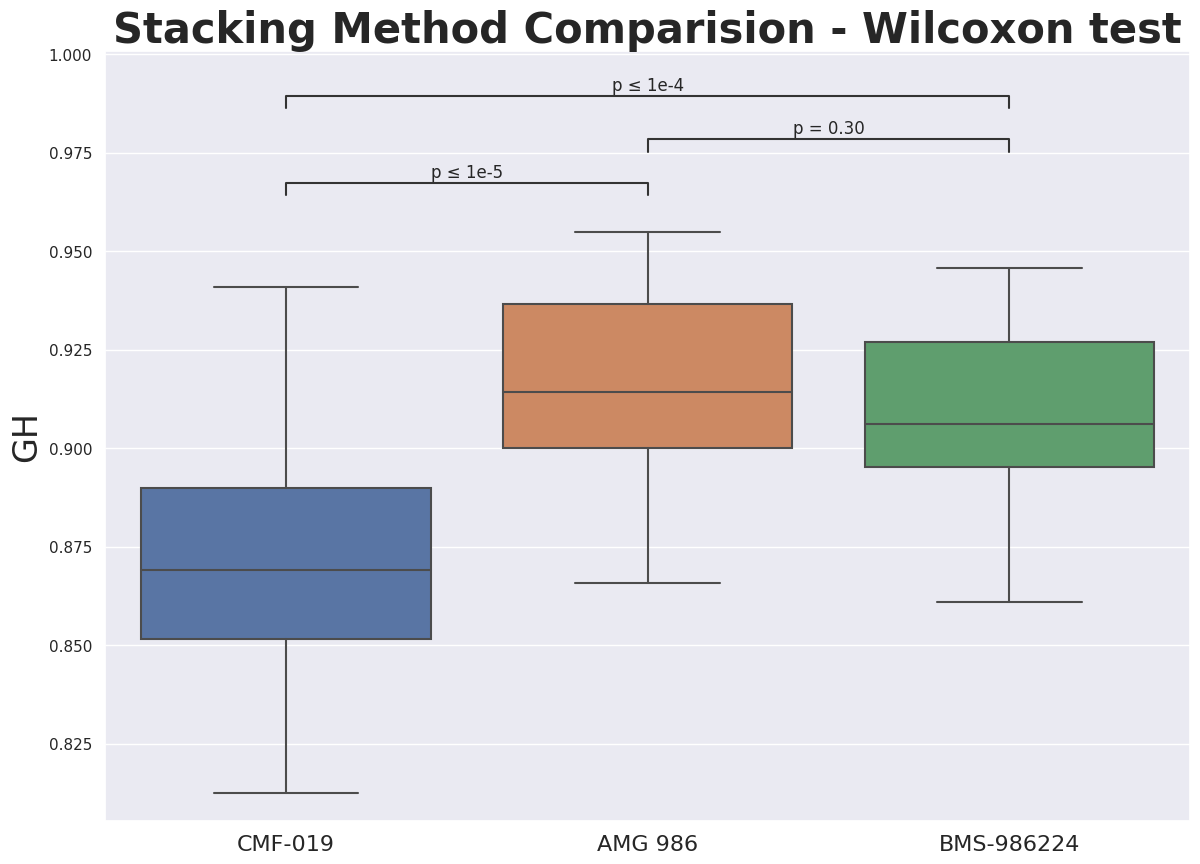

In [257]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(GH.reset_index(), id_vars=['index'], value_vars=GH.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(GH['CMF-019'].astype('float'), GH['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(GH['AMG 986'].astype('float'), GH['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(GH['CMF-019'].astype('float'), GH['BMS-986224'].astype('float'), alternative="two-sided"),
                
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'GH',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='GH', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('GH', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
#plt.savefig("/home/labhhc/Documents/Workspace/D18/TrucD18/stacking/Stacking AUC- cps25 - Wilocoxon.png", dpi = 600)

# 6. Optimization

- AMG 986

# 7. Internal comparison

- AMG_986_RDK7
- Ensemble
- Stacking - AMG 986
- Optimization

# 8. External